<a href="https://colab.research.google.com/github/vindinudecosta/Mobile-Based-Crop-Leaf-Disease-Detection-System-Using-Deep-Learning/blob/models/Potato_Disease_Classification_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
!ls gdrive/MyDrive

 621654910_assignment_1.pdf
'CamScanner 07-15-2022 15.39.pdf'
'CamScanner 08-04-2022 23.24 - Page 5.pdf'
'CamScanner 08-04-2022 23.24.pdf'
'CamScanner 08-25-2022 15.06.pdf'
 Classroom
'Colab Notebooks'
'Copy of IMG_20200224_100704_929.jpg'
 CRE_04_621654910.pdf
 CV-Kenuka.gdoc
 DMX3203_TMA_01_621654910.pdf
 DMX3206_TMA_1_621654910.pdf
'Document 9 (1).pdf'
'Document 9.pdf'
 EEX3410_TMA2_621654910.pdf
'fpf-nzzh-eyd - Jan 8, 2023.gjam'
'Getting started.pdf'
 IMG_20200224_100704_929.jpg
'IMG_20201028_103947 (1).pdf'
 IMG_20201028_103947.pdf
'IMG_20201028_104356 (1).pdf'
'IMG_20201028_104356 (2).pdf'
'IMG_20201028_104356 (3).pdf'
'IMG_20201028_104356 (4).pdf'
 IMG_20201028_104356.pdf
'jsh-wwzi-saz - Jul 17, 2022.gjam'
'Kenuka_OUSL (1).pdf'
 Kenuka_OUSL.pdf
 MHZ3352_621654910.pdf
'PCB_PCB_motion sensor.pdf'
'PCB_PCB_motion sensor switch_2_2022-09-11.pdf'
'PCB_PCB_motion sensor switch.pdf'
 Potato_disease_classification_models
 PotatoDisease.zip
 registration-2021_322031600636_new.pdf
'Schema

In [ ]:
!unzip gdrive/MyDrive/PotatoDisease.zip

Archive:  gdrive/MyDrive/PotatoDisease.zip
   creating: PlantVillage/Potato___Early_blight/
  inflating: PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG  
  inflating: PlantVillage/Potato___Early_blight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG  
  inflating: PlantVillage/Potato___Early_blight/009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885.JPG  
  inflating: PlantVillage/Potato___Early_blight/00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG  
  inflating: PlantVillage/Potato___Early_blight/0182e991-97f0-4805-a1f7-6e1b4306d518___RS_Early.B 7015.JPG  
  inflating: PlantVillage/Potato___Early_blight/02578b86-b234-4ac0-9bc3-691b5610e2bf___RS_Early.B 7562.JPG  
  inflating: PlantVillage/Potato___Early_blight/0267d4ca-522e-4ca0-b1a2-ce925e5b54a2___RS_Early.B 7020.JPG  
  inflating: PlantVillage/Potato___Early_blight/028f9b73-142f-499a-9c7b-d7c1ed5e5506___RS_Early.B 8546.JPG  
  inflating: PlantVillage/Potato___E

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS =50

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("PlantVillage", shuffle = True,image_size = (IMAGE_SIZE,IMAGE_SIZE),batch_size =BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

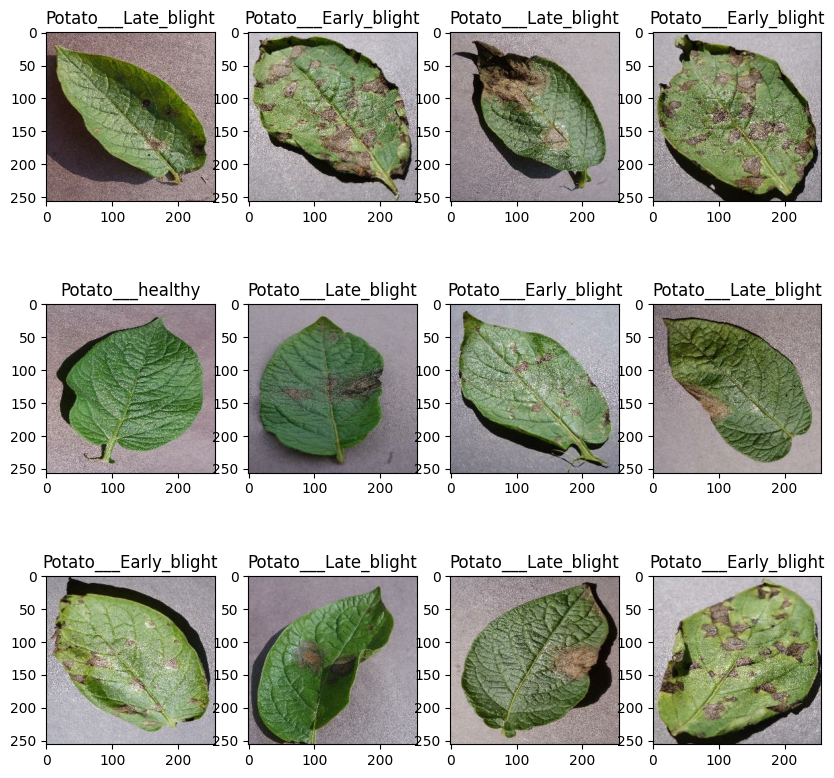

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])

In [ ]:
def get_dataset_partitions_tf(ds, train_split = 0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size= 10000):

        ds_size = len(ds)
        if shuffle:
            ds = ds.shuffle(shuffle_size, seed=12)

        train_size = int(train_split*ds_size)
        val_size = int(val_split*ds_size)
        train_ds = ds.take(train_size)
        val_ds = ds.skip(train_size).take(val_size)
        test_ds = ds.skip(train_size).skip(val_size)

        return train_ds , val_ds, test_ds

In [ ]:
train_ds, val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.Rescaling(IMAGE_SIZE,IMAGE_SIZE),
                    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)])

In [ ]:
data_augmentation = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
                    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)])

In [ ]:
input_shape =(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes =3

model = models.Sequential([

    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation ='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,(3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,(3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,(3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,(3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,(3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation ='relu'),
    layers.Dense(n_classes,activation = 'softmax')

])

model.build(input_shape =input_shape)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 32, 256, 256, 3)   0         
                                                                 
 sequential_1 (Sequential)   multiple                  0         
                                                                 
 conv2d_13 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                 

In [ ]:
model.compile(
  optimizer = 'adam',
  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits =False),
  metrics = ['accuracy']

)

In [ ]:
history = model.fit(train_ds,
         epochs = EPOCHS,
         batch_size = BATCH_SIZE,
         verbose =1,
         validation_data = val_ds)

Epoch 1/50
54/54 [==============================] - 23s 102ms/step - loss: 2.4246 - accuracy: 0.4809 - val_loss: 0.7214 - val_accuracy: 0.6875
Epoch 2/50
54/54 [==============================] - 3s 61ms/step - loss: 0.6748 - accuracy: 0.7147 - val_loss: 0.4922 - val_accuracy: 0.8073
Epoch 3/50
54/54 [==============================] - 3s 63ms/step - loss: 0.4301 - accuracy: 0.8206 - val_loss: 0.4543 - val_accuracy: 0.7865
Epoch 4/50
54/54 [==============================] - 3s 61ms/step - loss: 0.3675 - accuracy: 0.8536 - val_loss: 0.2369 - val_accuracy: 0.9062
Epoch 5/50
54/54 [==============================] - 3s 61ms/step - loss: 0.2813 - accuracy: 0.8843 - val_loss: 0.3474 - val_accuracy: 0.8490
Epoch 6/50
54/54 [==============================] - 3s 62ms/step - loss: 0.2776 - accuracy: 0.8918 - val_loss: 0.1982 - val_accuracy: 0.9010
Epoch 7/50
54/54 [==============================] - 3s 62ms/step - loss: 0.2929 - accuracy: 0.8976 - val_loss: 0.2347 - val_accuracy: 0.9062
Epoch 8/50


In [ ]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 2s 29ms/step - loss: 0.0711 - accuracy: 0.9609


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

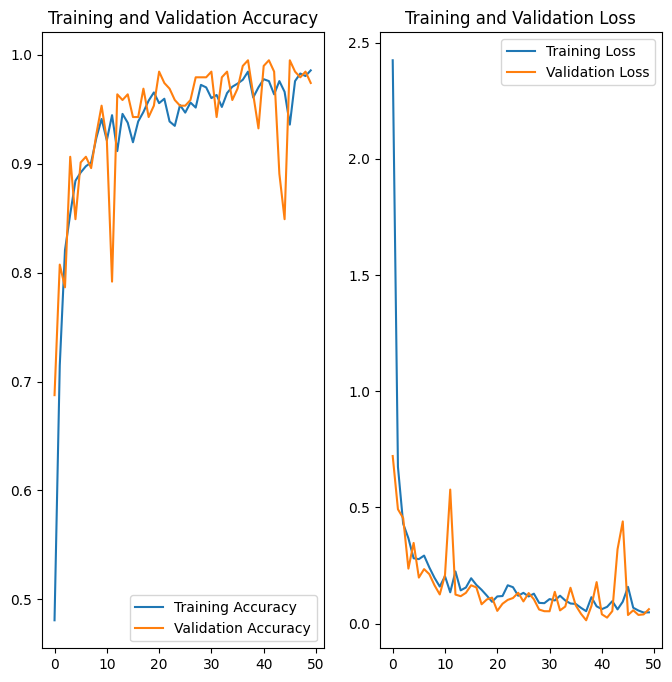

In [ ]:
plt.figure(figsize =(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label = 'Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label = 'Training Loss')
plt.plot(range(EPOCHS),val_loss,label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

first image to predict
actual label:  Potato___Late_blight
1/1 [==============================] - 0s 375ms/step
Predicted label:  Potato___Late_blight


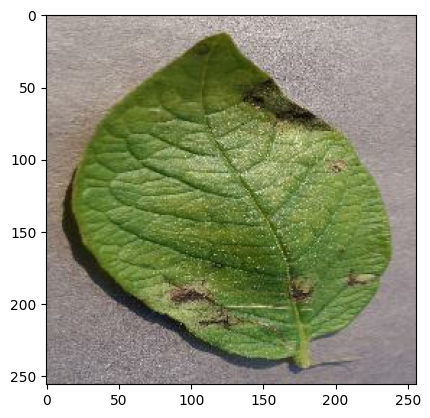

In [ ]:
import numpy as np

for images_batch, labels_batch in test_ds.take(1):
  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()

  print("first image to predict")
  plt.imshow(first_image)
  print("actual label: ", class_names[first_label])


  batch_prediction = model.predict(images_batch)
  print("Predicted label: ",class_names[np.argmax(batch_prediction[0])])



In [ ]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array,0)

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100* (np.max(predictions[0])),2)

  return predicted_class, confidence

1/1 [==============================] - 0s 21ms/step


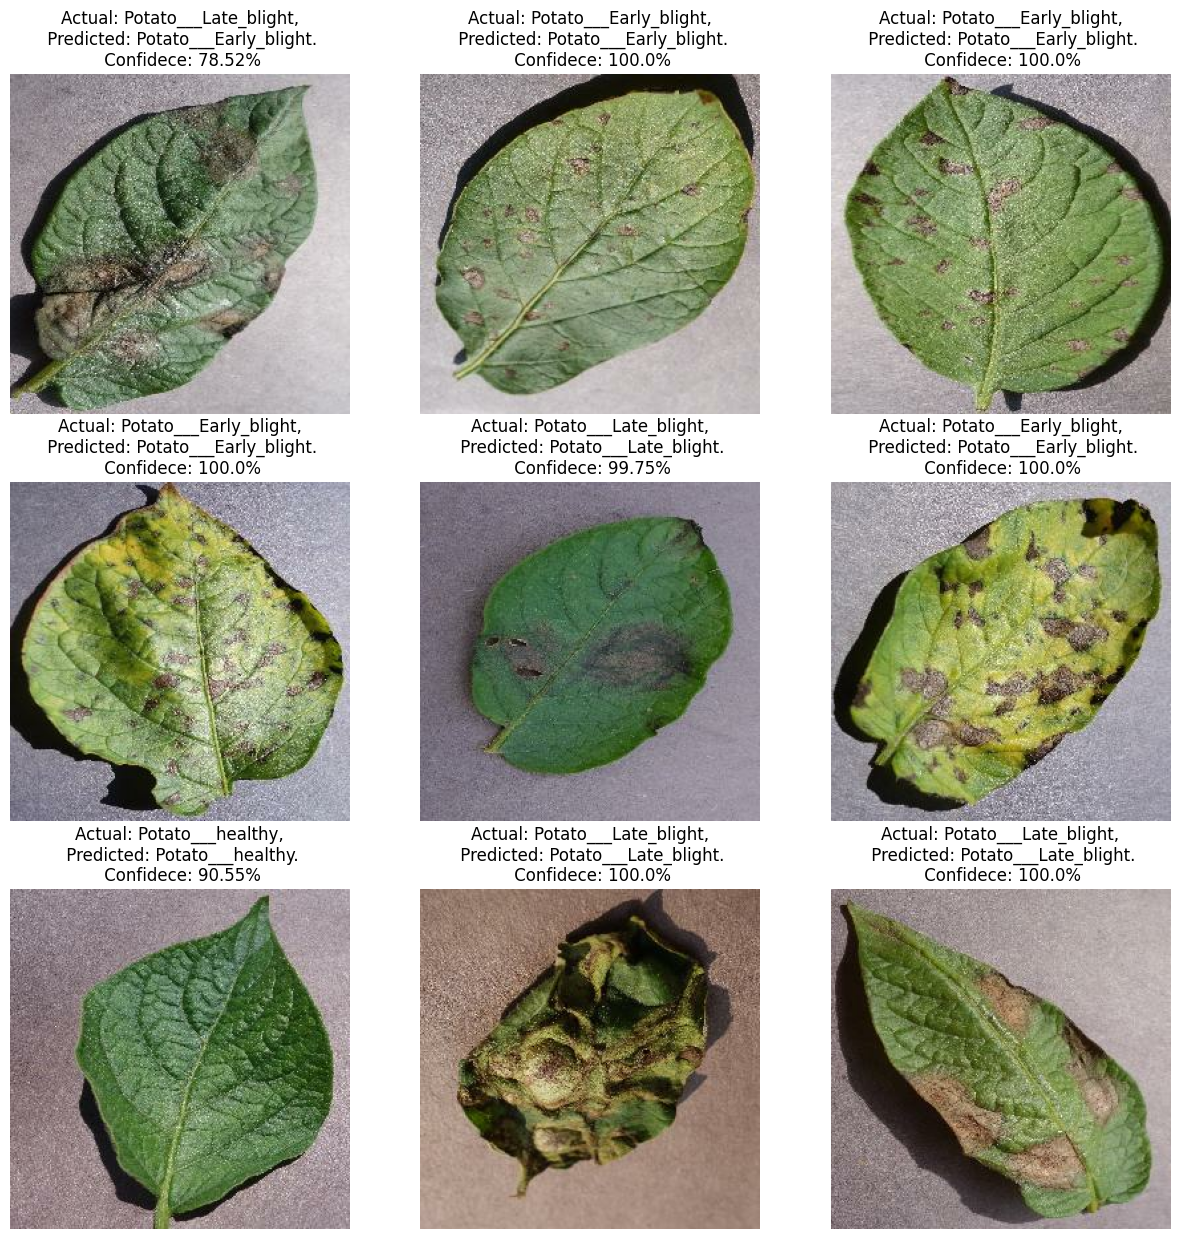

In [ ]:
plt.figure(figsize = (15,15))
for images, labels in test_ds.take(1):

  for i in range(9):

    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))

    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidece: {confidence}%")

    plt.axis("off")

In [ ]:
model_version =2
model.save("/content/gdrive/MyDrive/Potato_disease_classification_models/trained_model_1")




